<a href="https://colab.research.google.com/github/hamzaaslam276/Polynomial-Regression-genrated-Dataset/blob/main/Polynomial_Regression_genrated_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import operator

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


### Creating te dataset

In [2]:
np.random.seed(0)
x = np.random.normal(0, 1, 20)
y = np.random.normal(0, 1, 20)
print(f"x: {x}")
print(f"y: {y}")

x: [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574]
y: [-2.55298982  0.6536186   0.8644362  -0.74216502  2.26975462 -1.45436567
  0.04575852 -0.18718385  1.53277921  1.46935877  0.15494743  0.37816252
 -0.88778575 -1.98079647 -0.34791215  0.15634897  1.23029068  1.20237985
 -0.38732682 -0.30230275]


### Plotting the dataset


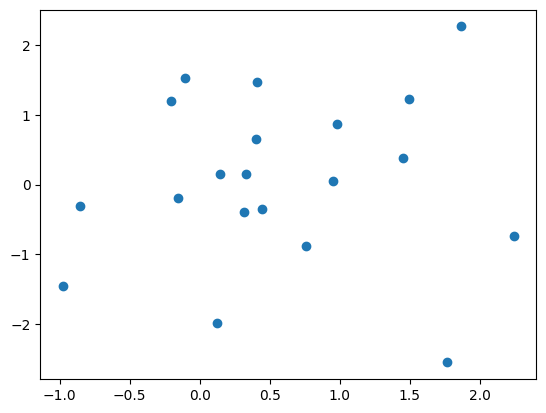

In [4]:
plt.scatter(x,y)
plt.show()

In [6]:
#Converting data from 1D array to 2D array
x = x[:, np.newaxis]
y = y[:, np.newaxis]

### Doing Linear Regression


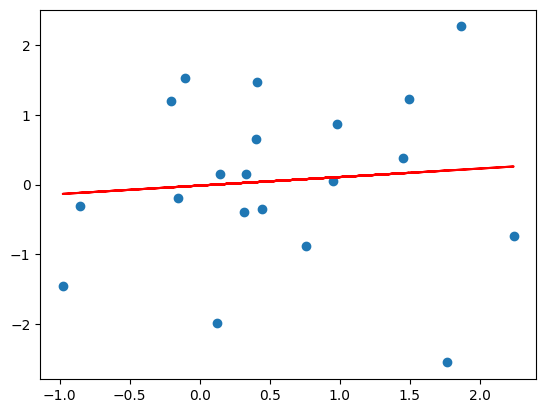

In [7]:
model_lin = LinearRegression()
model_lin.fit(x, y)
y_pred = model_lin.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()

In [8]:
mse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print(mse)
print(r2)

1.1832766119182259
0.007636444138149345


### Doing Polynomial Regression



In [10]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

In [11]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

### Calculating error


In [12]:
mse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(mse)
print(r2)

1.1507521092081143
0.061440511342737425


### Visualising results


In [15]:
print("coefe : " , model.coef_)
print("Intercept : ", model.intercept_)

coefe :  [[ 0.          0.54780984 -0.32901375]]
Intercept :  [0.08832508]


In [16]:
res = "y = f(x) = " + str(model.intercept_[0])

for i,r in enumerate(model.coef_[0]):
    res = res + " + {}*x^{}".format("%.2f" % r, i)

print (res)

y = f(x) = 0.08832508210279363 + 0.00*x^0 + 0.55*x^1 + -0.33*x^2


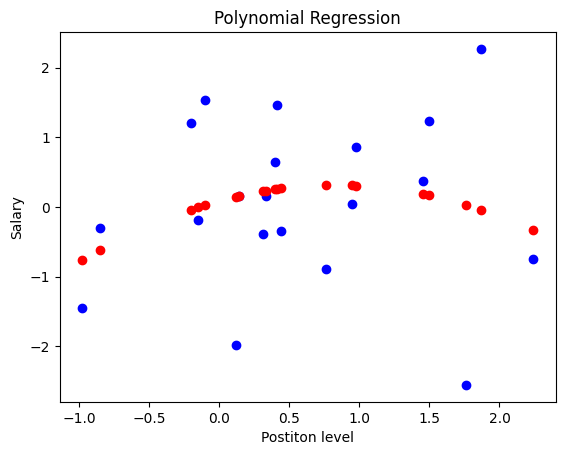

In [17]:
# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'blue')

plt.scatter(x, model.predict(polynomial_features.fit_transform(x)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Postiton level')
plt.ylabel('Salary')

plt.show()

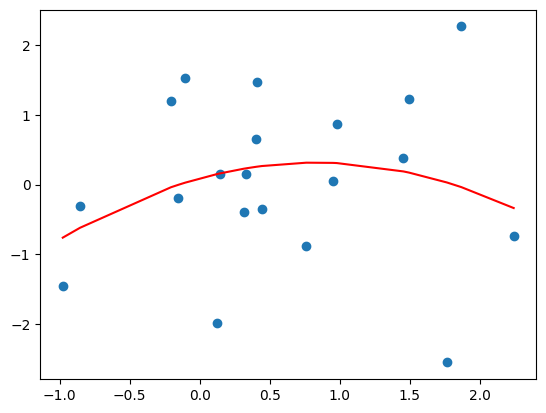

In [18]:
plt.scatter(x, y)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='red')
plt.show()